In [80]:
from datasets import load_dataset
from transformers import LlamaTokenizer
import json

tokenizer = LlamaTokenizer.from_pretrained("decapoda-research/llama-7b-hf", add_eos_token=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data1 = load_dataset("json", data_files=r"")
data2 = load_dataset("json", data_files=r"")

# Convert the JSON strings to dictionaries using the applymap method
def generate_prompt(essay, response):
    try:
        prompt = f"""수필 평가자로서 제공된 한국어 답변에 대해 1점부터 5점까지의 점수를 매기는 역할을 맡았습니다. 대답은 철저히 단계별로 사고 과정을 검토한 후, 추가 설명 없이 단일 정숫값으로 점수를 표시해 주세요.
        평가하는 글은 주어진 질문에 대한 답변입니다. 평가는 이유와 근거의 적절성을 기반으로 해야 합니다. 점수를 매길 때 다음 측면을 고려해 주세요:

        주장-이유/근거 관계의 적절성: 주장 또는 주장의 이유를 뒷받침하는 근거가 적절한지 평가해 주세요. 주장이나 주장의 이유를 충분히 지지하는 근거가 제공되었는지, 주장이 관련 문제와 일치하는지 확인해 주세요.

        다음과 같은 점수 체계를 사용해 주세요:
        5점: 이유나 근거가 매우 적절하여 설득력이 높음.
        4점: 이유나 근거가 대체로 적절하여 다소 설득력이 있음.
        3점: 이유나 근거 가운데 일부가 적절하지 않으나, 대체로 수용할 만함.
        2점: 이유나 근거가 적절하지 않은 경우가 많아 설득력이 떨어짐.
        1점: 이유나 근거가 대부분 적절하지 않아 설득력이 매우 낮음.

        이제 다음 질문과 답변을 주의 깊게 검토하고 점수를 매겨 주세요:
        ### 질문:
        {essay["Essay_prompt"]}
        ### 답변:
        {essay["Essay"]}
        ### 정답:
        {response["Response"]}
        ### 점수:
        {response["Grade"]}"""
        return prompt
    except (json.JSONDecodeError, ValueError) as e:
        # Handle empty or invalid response data here
        print(f"Error processing response data: {e}")
        # Provide a default prompt with empty strings for missing values in the response
        prompt = f"""수필 평가자로서 제공된 한국어 답변에 대해 1점부터 5점까지의 점수를 매기는 역할을 맡았습니다. 대답은 철저히 단계별로 사고 과정을 검토한 후, 추가 설명 없이 단일 정숫값으로 점수를 표시해 주세요.
        평가하는 글은 주어진 질문에 대한 답변입니다. 평가는 이유와 근거의 적절성을 기반으로 해야 합니다. 점수를 매길 때 다음 측면을 고려해 주세요:

        주장-이유/근거 관계의 적절성: 주장 또는 주장의 이유를 뒷받침하는 근거가 적절한지 평가해 주세요. 주장이나 주장의 이유를 충분히 지지하는 근거가 제공되었는지, 주장이 관련 문제와 일치하는지 확인해 주세요.

        다음과 같은 점수 체계를 사용해 주세요:
        5점: 이유나 근거가 매우 적절하여 설득력이 높음.
        4점: 이유나 근거가 대체로 적절하여 다소 설득력이 있음.
        3점: 이유나 근거 가운데 일부가 적절하지 않으나, 대체로 수용할 만함.
        2점: 이유나 근거가 적절하지 않은 경우가 많아 설득력이 떨어짐.
        1점: 이유나 근거가 대부분 적절하지 않아 설득력이 매우 낮음.

        이제 다음 질문과 답변을 주의 깊게 검토하고 점수를 매겨 주세요:
        ### 질문:
        {essay["Essay_prompt"]}
        ### 답변:
        {essay["Essay"]}
        ### 정답:
        [No response data available]
        ### 점수:
        {response["Grade"]}"""
        return prompt
    
data = []

# Generate and tokenize prompts from both datasets
for (essay, response) in zip(data1['train'], data2['train']):
    prompt = generate_prompt(essay, response)
    tokenized_prompt = tokenizer(prompt)
    data.append({"prompt": tokenized_prompt})



The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


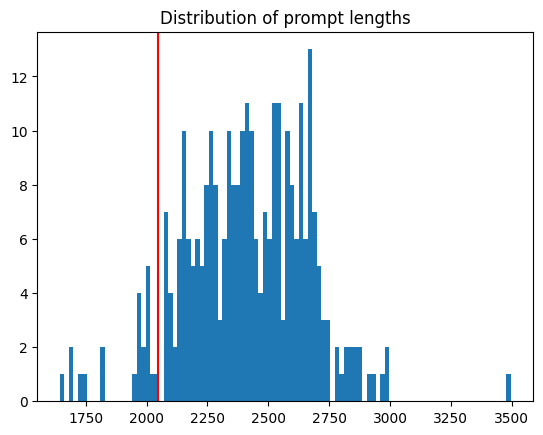

In [81]:
import matplotlib.pyplot as plt

prompt_lengths = [len(entry["prompt"]["input_ids"]) for entry in data]
plt.hist(prompt_lengths, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(2048, color="red")

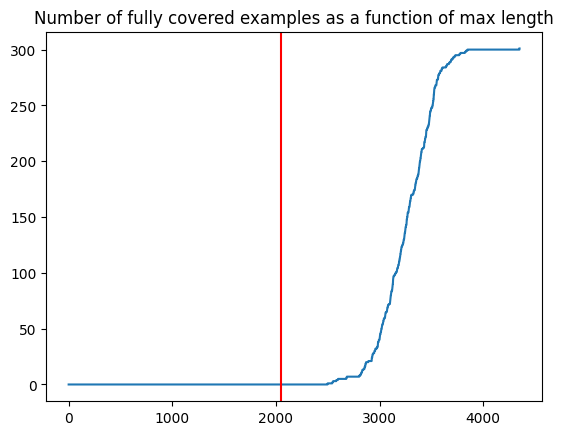

In [78]:
plt.plot([len([l for l in prompt_lengths if l <= m]) for m in range(max(prompt_lengths) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=2048, color="red")

Percentage of tokens left out:

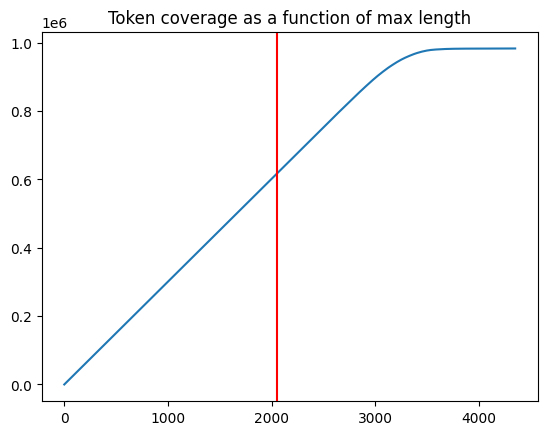

In [79]:
plt.plot([sum(min(l, m) for l in prompt_lengths) for m in range(max(prompt_lengths) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=2048, color="red")